# Model Tuning
Hyperparameter tuning logic for models

In [33]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from eda import preprocess_data
from tuning import (
    grid_search_logistic_regression,
    grid_search_random_forest,
    grid_search_gradient_boosting,
    grid_search_knn
)
from models import evaluate_model
from matplotlib import pyplot as plt

## Load and Preprocess Data

In [34]:
df = pd.read_csv('../data/train.csv')
processed = preprocess_data(df)
X = processed.drop(columns=['Survived'])
y = processed['Survived']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

def collect_metrics(model_name, y_true, y_pred, metrics_dict):
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy_score(y_true, y_pred))
    metrics_dict['Precision'].append(precision_score(y_true, y_pred))
    metrics_dict['Recall'].append(recall_score(y_true, y_pred))
    metrics_dict['F1 Score'].append(f1_score(y_true, y_pred))

## Logistic Regression

In [36]:
best_lr = grid_search_logistic_regression(X_train, y_train)
y_pred_lr = best_lr.predict(X_val)
evaluate_model(y_val, y_pred_lr)
collect_metrics('Logistic Regression', y_val, y_pred_lr, metrics)


--- Grid Search: Logistic Regression ---
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best F1 Score (CV): 0.7315
Accuracy:  0.8045
Precision: 0.7349
Recall:    0.8243
F1 Score:  0.7771
Confusion Matrix:
[[83 22]
 [13 61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       105
           1       0.73      0.82      0.78        74

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179



## Random Forest

In [37]:
best_rf = grid_search_random_forest(X_train, y_train)
y_pred_rf = best_rf.predict(X_val)
evaluate_model(y_val, y_pred_rf)
collect_metrics('Random Forest', y_val, y_pred_rf, metrics)


--- Grid Search: Random Forest ---
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score (CV): 0.7528
Accuracy:  0.8212
Precision: 0.8387
Recall:    0.7027
F1 Score:  0.7647
Confusion Matrix:
[[95 10]
 [22 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



## Gradient Boosting

In [38]:
best_gb = grid_search_gradient_boosting(X_train, y_train)
y_pred_gb = best_gb.predict(X_val)
evaluate_model(y_val, y_pred_gb)
collect_metrics('Gradient Boosting', y_val, y_pred_gb, metrics)


--- Grid Search: Gradient Boosting ---
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score (CV): 0.7529
Accuracy:  0.8212
Precision: 0.8088
Recall:    0.7432
F1 Score:  0.7746
Confusion Matrix:
[[92 13]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## K-Nearest Neighbors

In [39]:
best_knn = grid_search_knn(X_train, y_train)
y_pred_knn = best_knn.predict(X_val)
evaluate_model(y_val, y_pred_knn)
collect_metrics('KNN', y_val, y_pred_knn, metrics)


--- Grid Search: KNN ---
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best F1 Score (CV): 0.7350
Accuracy:  0.7877
Precision: 0.7571
Recall:    0.7162
F1 Score:  0.7361
Confusion Matrix:
[[88 17]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# Evaluation

                 Model  Accuracy  Precision    Recall  F1 Score
0    Gradient Boosting  0.832402   0.823529  0.756757  0.788732
1  Logistic Regression  0.804469   0.734940  0.824324  0.777070
2        Random Forest  0.821229   0.838710  0.702703  0.764706
3                  KNN  0.787709   0.757143  0.716216  0.736111


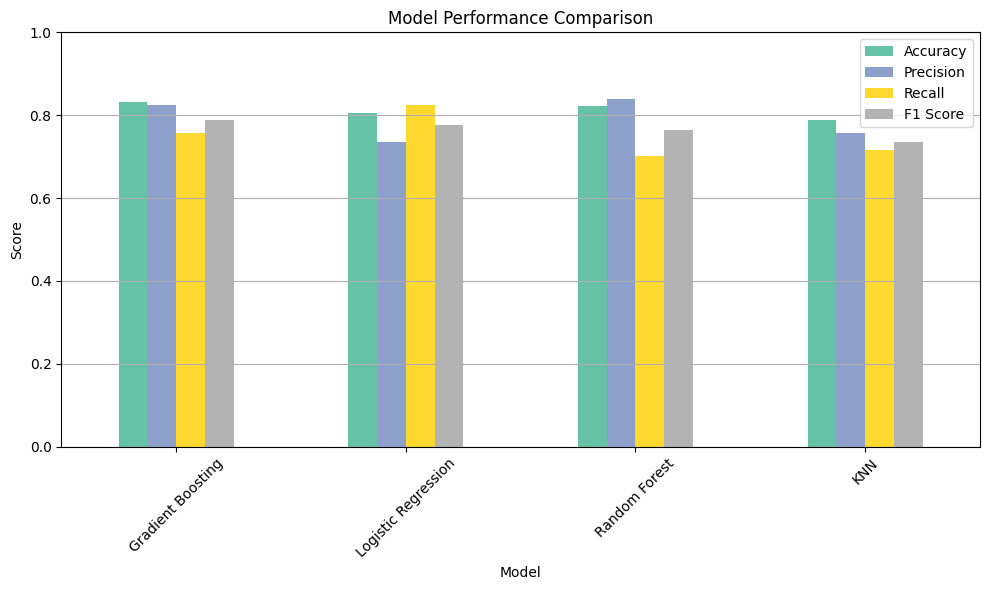

In [32]:
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)
metrics_df.reset_index(drop=True, inplace=True)
print(metrics_df)

metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', figsize=(10, 6), colormap='Set2'
)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Model-by-Model Analysis

### Gradient Boosting
- Highest F1 score (0.789) and accuracy (0.832)
- Strong balance between precision (0.824) and recall (0.757)
- Suggests this model generalizes well and makes balanced decisions between FPs and FNs

### Logistic Regression
- Highest recall (0.824): successfully identifies most survivors
- Lower precision (0.735), more FPs
- Solid accuracy (0.804), F1 score close to top

### Random Forest
- Highest precision (0.839) but lowest recall (0.703)
- F1 score (0.765) descent but trails Gradient Boosting model
- Slightly more conservative with fewer FPs and more FNs

### K-Nearest Neighbors
- Lowest F1 score (0.736) and accuracy (0.788) of all four
- Underperforms in both precision and recall
- Not good candidate for ensembling

## Summary Recommendation

General Performance: Gradient Boosting  
Maximize Recall: Logistic Regression  
Maximize Precision: Random Forest  
